*problem: GLIBCXX 3.4.30 not found in conda environment*

solution: 
check:
strings /usr/lib/x86_64-linux-gnu/libstdc++.so.6 | grep GLIBCXX
then change:
ln -sf /usr/lib/x86_64-linux-gnu/libstdc++.so.6 /home/anavani/anaconda3/envs/dmcgb/bin/../lib/libstdc++.so.6

* Download robomimic data
python robomimic/robomimic/scripts/download_datasets.py --tasks lift can square tool_hang transport

* Convert delta actions to absolute actions
```bash
python utils/robomimic_convert_action.py --dataset=robomimic/datasets/lift/ph/low_dim.hdf5
```

* Save waypoints
```bash
python utils/robomimic_save_waypoints.py --dataset=robomimic/datasets/square/ph/low_dim.hdf5 --err_threshold=0.005
```

* Replay waypoints (save 3 videos and 3D visualizations by default)
```bash
mkdir video
python example/robomimic_waypoint_replay.py --dataset=robomimic/datasets/lift/ph/low_dim.hdf5 \
    --record_video --video_path video/lift_waypoint.mp4 --task=lift \
    --plot_3d --auto_waypoint --err_threshold=0.005

* Train DP_awe
CUDA_VISIBLE_DEVICES=1 python diffusion_policy/train.py --config-dir=config --config-name=waypoint_image_square_ph_diffusion_policy_transformer.yaml hydra.run.dir='data/outputs/${now:%Y.%m.%d}/${now:%H.%M.%S}_${name}_${task_name}'

* Train original DP
CUDA_VISIBLE_DEVICES=1 python diffusion_policy/train.py --config-dir=config --config-name=baseline_image_can_ph_diffusion_policy_transformer.yaml hydra.run.dir='data/outputs/${now:%Y.%m.%d}/original_dp/${now:%H.%M.%S}_${name}_${task_name}'

* EVal original DP
python diffusion_policy/eval.py --checkpoint data/outputs/2025.03.26/06.32.29_train_diffusion_transformer_hybrid_square_image/checkpoints/epoch=1100-test_mean_score=0.500.ckpt --output_dir data/output/eval/robomimic/dp_awe/ --device cuda:0

* Modified eval DP
python diffusion_policy/eval.py --checkpoint data/outputs/2025.03.26/06.32.29_train_diffusion_transformer_hybrid_square_image/checkpoints/epoch=1100-test_mean_score=0.500.ckpt --device cuda:5

* Modified eval all DP ckpts
python diffusion_policy/eval_all.py --checkpoint /home/ubuntu/chd/code/awe/data/outputs/2025.03.31/original_dp/08.38.32_train_diffusion_transformer_hybrid_lift_image/checkpoints --device cuda:5


* ACT

* Visualize waypoints
python example/act_waypoint.py --dataset=data/act/sim_transfer_cube_scripted --err_threshold=0.01 --plot_3d --end_idx=0 

* Save waypoints
python example/act_waypoint.py --dataset=data/act/sim_transfer_cube_scripted --err_threshold=0.01 --save_waypoints 

In [3]:
import os

path = "/home/ubuntu/chd/code/awe/data/outputs/2025.03.26/06.32.29_train_diffusion_transformer_hybrid_square_image/checkpoints/"
print(os.path.dirname(path))


/home/ubuntu/chd/code/awe/data/outputs/2025.03.26/06.32.29_train_diffusion_transformer_hybrid_square_image/checkpoints


In [ ]:
mkdir video
python example/robomimic_waypoint_replay.py --dataset=robomimic/datasets/can/ph/low_dim.hdf5 \
    --record_video --video_path video/can_waypoint.mp4 --task=can \
    --plot_3d --auto_waypoint --err_threshold=0.005

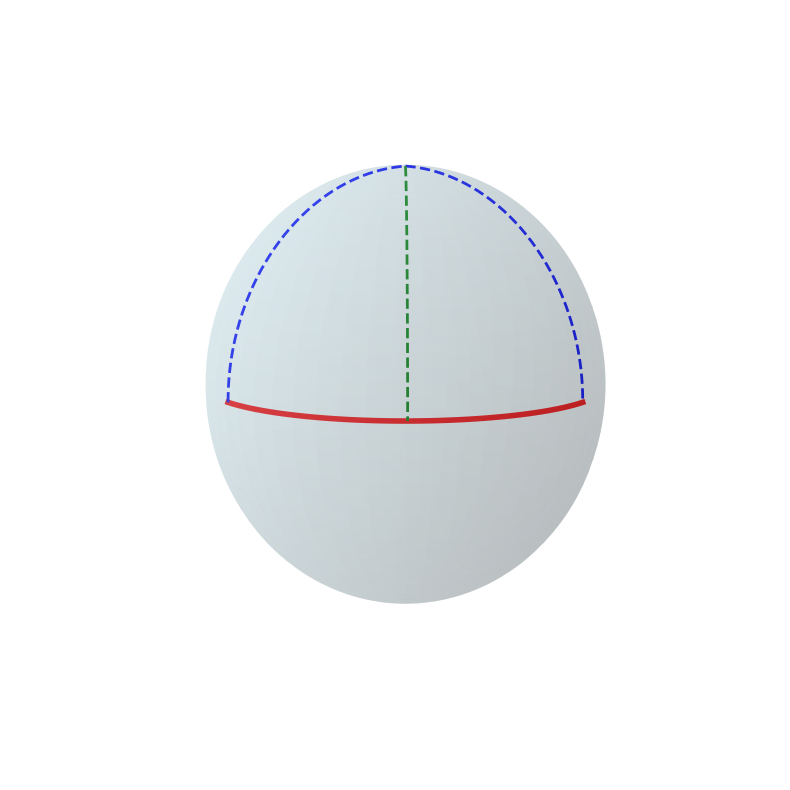

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建图形
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 创建单位球
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# 绘制单位球(透明度为0.4)
ax.plot_surface(x, y, z, color='lightblue', alpha=0.2, edgecolor=None)

# 创建120度的红色弧线 (120度 = 2pi/3 弧度)
# 我们从-60度到+60度，这样弧线就横跨左右
theta = np.linspace(-np.pi/3, np.pi/3, 100)  # 120度的弧 (-60度到+60度)
arc_x = np.cos(theta)
arc_y = np.sin(theta)
arc_z = np.zeros_like(theta)  # 在赤道平面上

# 绘制红色弧线
ax.plot(arc_x, arc_y, arc_z, color='red', linewidth=4)

# 获取红色弧线的左端点、中点和右端点
left_point = [arc_x[0], arc_y[0], arc_z[0]]  # 左端点
mid_point = [arc_x[50], arc_y[50], arc_z[50]]  # 中点
right_point = [arc_x[-1], arc_y[-1], arc_z[-1]]  # 右端点

# 创建上方的点
top_point = [0, 0, 0.8]  # 右上方的点

# 创建从左端点到上方点的蓝色虚线弧线
t1 = np.linspace(0, 1, 50)
blue_arc1_x = left_point[0] * (1-t1) + top_point[0] * t1
blue_arc1_y = left_point[1] * (1-t1) + top_point[1] * t1
blue_arc1_z = left_point[2] * (1-t1) + top_point[2] * t1
# 将点投影到球面上
norm1 = np.sqrt(blue_arc1_x**2 + blue_arc1_y**2 + blue_arc1_z**2)
blue_arc1_x = blue_arc1_x / norm1
blue_arc1_y = blue_arc1_y / norm1
blue_arc1_z = blue_arc1_z / norm1

# 创建从上方点到右端点的蓝色虚线弧线
t2 = np.linspace(0, 1, 50)
blue_arc2_x = top_point[0] * (1-t2) + right_point[0] * t2
blue_arc2_y = top_point[1] * (1-t2) + right_point[1] * t2
blue_arc2_z = top_point[2] * (1-t2) + right_point[2] * t2
# 将点投影到球面上
norm2 = np.sqrt(blue_arc2_x**2 + blue_arc2_y**2 + blue_arc2_z**2)
blue_arc2_x = blue_arc2_x / norm2
blue_arc2_y = blue_arc2_y / norm2
blue_arc2_z = blue_arc2_z / norm2

# 创建从上方点到红色弧线中点的绿色虚线弧线
t3 = np.linspace(0, 1, 50)
green_arc_x = top_point[0] * (1-t3) + mid_point[0] * t3
green_arc_y = top_point[1] * (1-t3) + mid_point[1] * t3
green_arc_z = top_point[2] * (1-t3) + mid_point[2] * t3
# 将点投影到球面上
norm3 = np.sqrt(green_arc_x**2 + green_arc_y**2 + green_arc_z**2)
green_arc_x = green_arc_x / norm3
green_arc_y = green_arc_y / norm3
green_arc_z = green_arc_z / norm3

# 绘制蓝色虚线弧线
ax.plot(blue_arc1_x, blue_arc1_y, blue_arc1_z, color='blue', linestyle='--', linewidth=2)
ax.plot(blue_arc2_x, blue_arc2_y, blue_arc2_z, color='blue', linestyle='--', linewidth=2)

# 绘制绿色虚线弧线
ax.plot(green_arc_x, green_arc_y, green_arc_z, color='green', linestyle='--', linewidth=2)

# 移除坐标轴
ax.set_axis_off()

# 设置坐标轴比例相等
ax.set_box_aspect([1,1,1])

# 调整视角，使红色弧线在视图中央
ax.view_init(elev=10, azim=0)  # 调整为正面视角，轻微仰视角度

# 移除网格和背景色
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()

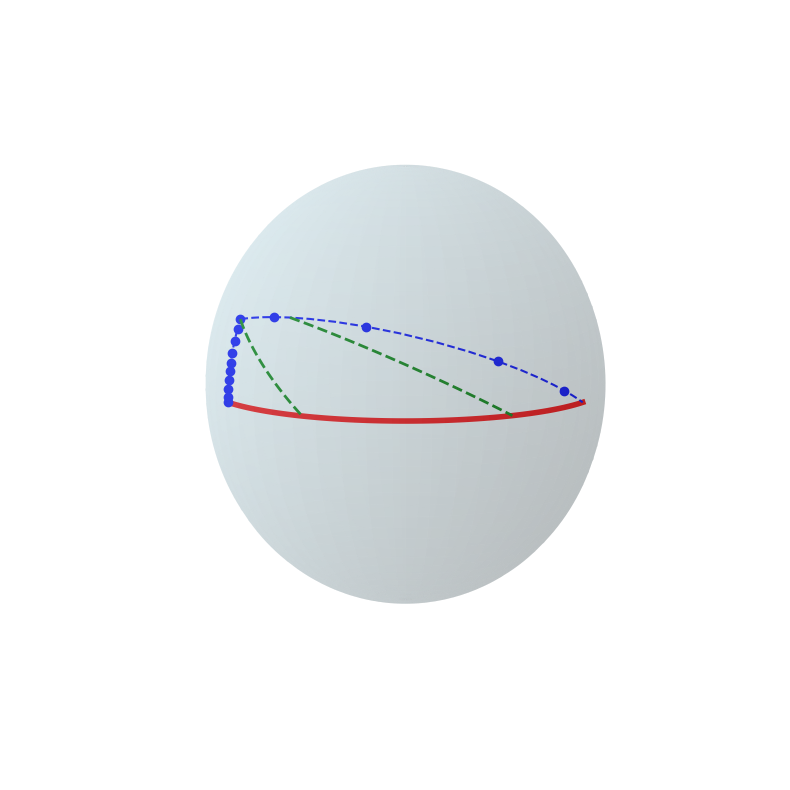

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建图形
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 创建单位球
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# 绘制单位球(透明度为0.4)
ax.plot_surface(x, y, z, color='lightblue', alpha=0.2, edgecolor=None)

# 创建120度的红色弧线 (120度 = 2pi/3 弧度)
# 我们从-60度到+60度，这样弧线就横跨左右
theta = np.linspace(-np.pi/3, np.pi/3, 100)  # 120度的弧 (-60度到+60度)
arc_x = np.cos(theta)
arc_y = np.sin(theta)
arc_z = np.zeros_like(theta)  # 在赤道平面上

# 绘制红色弧线
ax.plot(arc_x, arc_y, arc_z, color='red', linewidth=4)

# 获取红色弧线的左端点、左四分位点、右四分位点和右端点
left_point = [arc_x[0], arc_y[0], arc_z[0]]  # 左端点
left_quarter_point = [arc_x[25], arc_y[25], arc_z[25]]  # 左四分位点 (25是100的1/4)
right_quarter_point = [arc_x[75], arc_y[75], arc_z[75]]  # 右四分位点 (75是100的3/4)
right_point = [arc_x[-1], arc_y[-1], arc_z[-1]]  # 右端点

# 创建上方的点
top_point = [0, 0, 0.8]  # 右上方的点

# 计算左侧蓝色虚线的长度为原来的1/3，但起点仍为红色弧线左端点
# 先计算球面上从左端点到上方点的完整路径
t_full = np.linspace(0, 2, 200)
full_path_x = left_point[0] * (1-t_full) + top_point[0] * t_full
full_path_y = left_point[1] * (1-t_full) + top_point[1] * t_full
full_path_z = left_point[2] * (1-t_full) + top_point[2] * t_full
# 将点投影到球面上
norm_full = np.sqrt(full_path_x**2 + full_path_y**2 + full_path_z**2)
full_path_x = full_path_x / norm_full
full_path_y = full_path_y / norm_full
full_path_z = full_path_z / norm_full

# 只取前1/3的路径，但点更密集
third_point_index = 33  # 大约是100的1/3
new_end_point = [full_path_x[third_point_index], full_path_y[third_point_index], full_path_z[third_point_index]]

# 创建左侧蓝色虚线弧线（点密集）
t1 = np.linspace(0, 1, 80)  # 增加点的密度
blue_arc1_x = []
blue_arc1_y = []
blue_arc1_z = []
for t in t1[:int(80/3)]:  # 只取前1/3
    idx = int(t * 100)
    if idx < len(full_path_x):
        blue_arc1_x.append(full_path_x[idx])
        blue_arc1_y.append(full_path_y[idx])
        blue_arc1_z.append(full_path_z[idx])

# 创建从新终点到右端点的蓝色虚线弧线（点稀疏）
t2 = np.linspace(0, 1, 20)  # 减少点的密度
blue_arc2_x = new_end_point[0] * (1-t2) + right_point[0] * t2
blue_arc2_y = new_end_point[1] * (1-t2) + right_point[1] * t2
blue_arc2_z = new_end_point[2] * (1-t2) + right_point[2] * t2
# 将点投影到球面上
norm2 = np.sqrt(blue_arc2_x**2 + blue_arc2_y**2 + blue_arc2_z**2)
blue_arc2_x = blue_arc2_x / norm2
blue_arc2_y = blue_arc2_y / norm2
blue_arc2_z = blue_arc2_z / norm2

# 计算第二条蓝色虚线的上四分位点
blue_arc2_upper_quarter_idx = int(len(blue_arc2_x) * 0.25)  # 从新终点数1/4处
blue_arc2_upper_quarter = [
    blue_arc2_x[blue_arc2_upper_quarter_idx], 
    blue_arc2_y[blue_arc2_upper_quarter_idx], 
    blue_arc2_z[blue_arc2_upper_quarter_idx]
]

# 创建从上方点到左四分位点的第一条绿色虚线弧线
t3 = np.linspace(0, 1, 50)
green_arc1_x = new_end_point[0] * (1-t3) + left_quarter_point[0] * t3
green_arc1_y = new_end_point[1] * (1-t3) + left_quarter_point[1] * t3
green_arc1_z = new_end_point[2] * (1-t3) + left_quarter_point[2] * t3
# 将点投影到球面上
norm3 = np.sqrt(green_arc1_x**2 + green_arc1_y**2 + green_arc1_z**2)
green_arc1_x = green_arc1_x / norm3
green_arc1_y = green_arc1_y / norm3
green_arc1_z = green_arc1_z / norm3

# 创建从右侧蓝色虚线上四分位点到红色弧线右四分位点的第二条绿色虚线弧线
t4 = np.linspace(0, 1, 50)
green_arc2_x = blue_arc2_upper_quarter[0] * (1-t4) + right_quarter_point[0] * t4
green_arc2_y = blue_arc2_upper_quarter[1] * (1-t4) + right_quarter_point[1] * t4
green_arc2_z = blue_arc2_upper_quarter[2] * (1-t4) + right_quarter_point[2] * t4
# 将点投影到球面上
norm4 = np.sqrt(green_arc2_x**2 + green_arc2_y**2 + green_arc2_z**2)
green_arc2_x = green_arc2_x / norm4
green_arc2_y = green_arc2_y / norm4
green_arc2_z = green_arc2_z / norm4

# 绘制蓝色虚线弧线
ax.plot(blue_arc1_x, blue_arc1_y, blue_arc1_z, color='blue', linestyle='--', marker='o', markevery=3)
ax.plot(blue_arc2_x, blue_arc2_y, blue_arc2_z, color='blue', linestyle='--', marker='o', markevery=4)

# 绘制绿色虚线弧线
ax.plot(green_arc1_x, green_arc1_y, green_arc1_z, color='green', linestyle='--', linewidth=2)
ax.plot(green_arc2_x, green_arc2_y, green_arc2_z, color='green', linestyle='--', linewidth=2)

# 移除坐标轴
ax.set_axis_off()

# 设置坐标轴比例相等
ax.set_box_aspect([1,1,1])

# 调整视角，使红色弧线在视图中央
ax.view_init(elev=10, azim=0)  # 调整为正面视角，轻微仰视角度

# 移除网格和背景色
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()

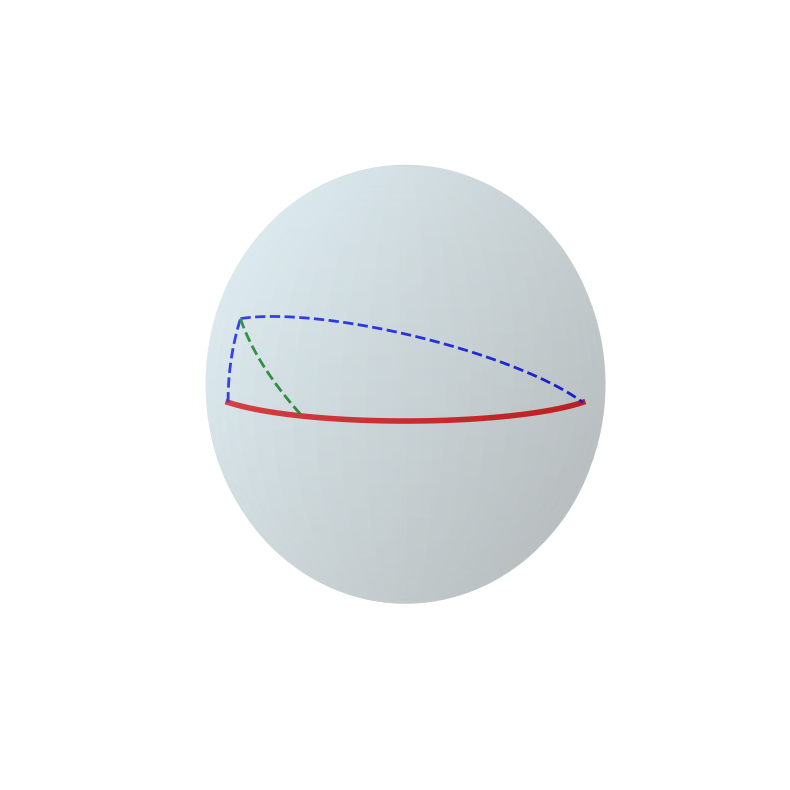

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建图形
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 创建单位球
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# 绘制单位球(透明度为0.4)
ax.plot_surface(x, y, z, color='lightblue', alpha=0.2, edgecolor=None)

# 创建120度的红色弧线 (120度 = 2pi/3 弧度)
# 我们从-60度到+60度，这样弧线就横跨左右
theta = np.linspace(-np.pi/3, np.pi/3, 100)  # 120度的弧 (-60度到+60度)
arc_x = np.cos(theta)
arc_y = np.sin(theta)
arc_z = np.zeros_like(theta)  # 在赤道平面上

# 绘制红色弧线
ax.plot(arc_x, arc_y, arc_z, color='red', linewidth=4)

# 获取红色弧线的左端点、左四分位点和右端点
left_point = [arc_x[0], arc_y[0], arc_z[0]]  # 左端点
left_quarter_point = [arc_x[25], arc_y[25], arc_z[25]]  # 左四分位点 (25是100的1/4)
right_point = [arc_x[-1], arc_y[-1], arc_z[-1]]  # 右端点

# 创建上方的点
top_point = [0, 0, 0.8]  # 右上方的点

# 计算左侧蓝色虚线的长度为原来的1/3，但起点仍为红色弧线左端点
# 先计算球面上从左端点到上方点的完整路径
t_full = np.linspace(0, 1, 100)
full_path_x = left_point[0] * (1-t_full) + top_point[0] * t_full
full_path_y = left_point[1] * (1-t_full) + top_point[1] * t_full
full_path_z = left_point[2] * (1-t_full) + top_point[2] * t_full
# 将点投影到球面上
norm_full = np.sqrt(full_path_x**2 + full_path_y**2 + full_path_z**2)
full_path_x = full_path_x / norm_full
full_path_y = full_path_y / norm_full
full_path_z = full_path_z / norm_full

# 只取前1/3的路径
third_point_index = 33  # 大约是100的1/3
new_end_point = [full_path_x[third_point_index], full_path_y[third_point_index], full_path_z[third_point_index]]

# 创建缩短后的左侧蓝色虚线弧线（从左端点到新的终点，长度为原来的1/3）
t1 = np.linspace(0, 1, 34)  # 0到33的索引
blue_arc1_x = full_path_x[:34]
blue_arc1_y = full_path_y[:34]
blue_arc1_z = full_path_z[:34]

# 创建从新终点到右端点的蓝色虚线弧线
t2 = np.linspace(0, 1, 50)
blue_arc2_x = new_end_point[0] * (1-t2) + right_point[0] * t2
blue_arc2_y = new_end_point[1] * (1-t2) + right_point[1] * t2
blue_arc2_z = new_end_point[2] * (1-t2) + right_point[2] * t2
# 将点投影到球面上
norm2 = np.sqrt(blue_arc2_x**2 + blue_arc2_y**2 + blue_arc2_z**2)
blue_arc2_x = blue_arc2_x / norm2
blue_arc2_y = blue_arc2_y / norm2
blue_arc2_z = blue_arc2_z / norm2

# 创建从上方点到左四分位点的绿色虚线弧线
t3 = np.linspace(0, 1, 50)
green_arc_x = new_end_point[0] * (1-t3) + left_quarter_point[0] * t3
green_arc_y = new_end_point[1] * (1-t3) + left_quarter_point[1] * t3
green_arc_z = new_end_point[2] * (1-t3) + left_quarter_point[2] * t3
# 将点投影到球面上
norm3 = np.sqrt(green_arc_x**2 + green_arc_y**2 + green_arc_z**2)
green_arc_x = green_arc_x / norm3
green_arc_y = green_arc_y / norm3
green_arc_z = green_arc_z / norm3

# 绘制蓝色虚线弧线
ax.plot(blue_arc1_x, blue_arc1_y, blue_arc1_z, color='blue', linestyle='--', linewidth=2)
ax.plot(blue_arc2_x, blue_arc2_y, blue_arc2_z, color='blue', linestyle='--', linewidth=2)

# 绘制绿色虚线弧线
ax.plot(green_arc_x, green_arc_y, green_arc_z, color='green', linestyle='--', linewidth=2)

# 移除坐标轴
ax.set_axis_off()

# 设置坐标轴比例相等
ax.set_box_aspect([1,1,1])

# 调整视角，使红色弧线在视图中央
ax.view_init(elev=10, azim=0)  # 调整为正面视角，轻微仰视角度

# 移除网格和背景色
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()